<a href="https://colab.research.google.com/github/RAJAS-KAR/ML_GUVI_Task7/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Social_Network_Ads.csv

**Importing the libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [42]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [43]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [44]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [45]:
df = df.drop(["User ID","Gender"], axis =1)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [46]:
#df["Gender"] = df["Gender"].map({"Male" : 0,"Female" : 1})
#df

In [47]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [48]:
x = df.drop(["Purchased"], axis =1)
y = df["Purchased"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

**Feature Scaling**

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  dt = DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  trainAccuracy = accuracy_score(y_train,dt.predict(x_train))
  dt = DecisionTreeClassifier(max_depth = depth)
  valAccuracy = cross_val_score(dt, x_train, y_train, cv =10)
  print("Depth :", depth, "Training Accuracy :", trainAccuracy,  'Cross val score :', np.mean(valAccuracy))

Depth : 1 Training Accuracy : 0.9964285714285714 Cross val score : 0.8321428571428571
Depth : 2 Training Accuracy : 0.9964285714285714 Cross val score : 0.9142857142857143
Depth : 3 Training Accuracy : 0.9964285714285714 Cross val score : 0.9035714285714285
Depth : 4 Training Accuracy : 0.9964285714285714 Cross val score : 0.9071428571428571
Depth : 5 Training Accuracy : 0.9964285714285714 Cross val score : 0.8857142857142858
Depth : 6 Training Accuracy : 0.9964285714285714 Cross val score : 0.8642857142857144
Depth : 7 Training Accuracy : 0.9964285714285714 Cross val score : 0.8642857142857142
Depth : 8 Training Accuracy : 0.9964285714285714 Cross val score : 0.8607142857142858
Depth : 9 Training Accuracy : 0.9964285714285714 Cross val score : 0.8571428571428571
Depth : 10 Training Accuracy : 0.9964285714285714 Cross val score : 0.8607142857142858


In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [57]:
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

**Making the Confusion Matrix**

In [58]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix
con_fus = confusion_matrix(y_test, y_pred)
print(con_fus)

[[67 11]
 [ 3 39]]


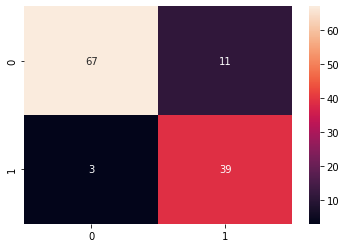

In [59]:
import seaborn as sns
sns.heatmap(con_fus, annot=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


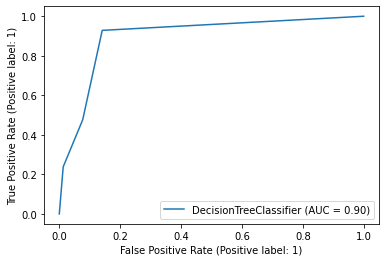

In [60]:
plot_roc_curve(dt, x_test,y_test)

**Visualising the Training set results**

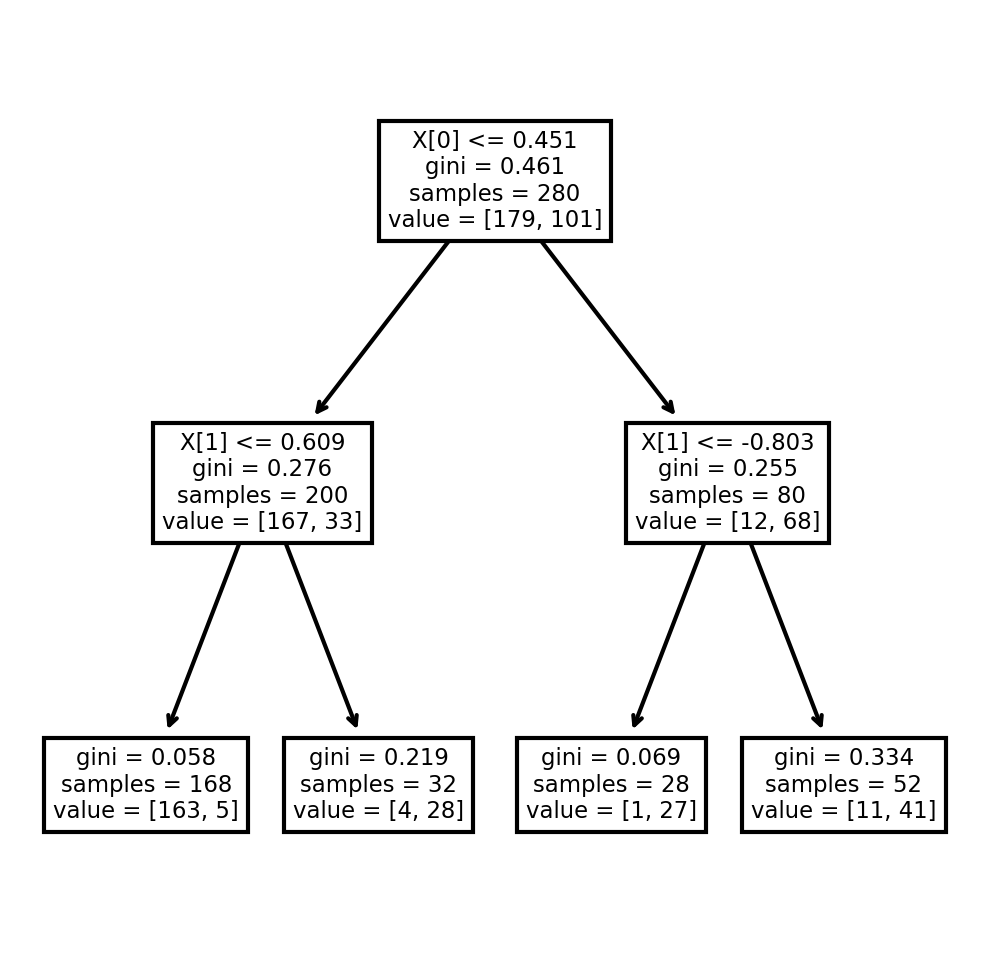

In [65]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi=300)
tree.plot_tree(dt. fit(x_train, y_train));
fig.savefig("imagename.png")

**Visualising the Test set results**

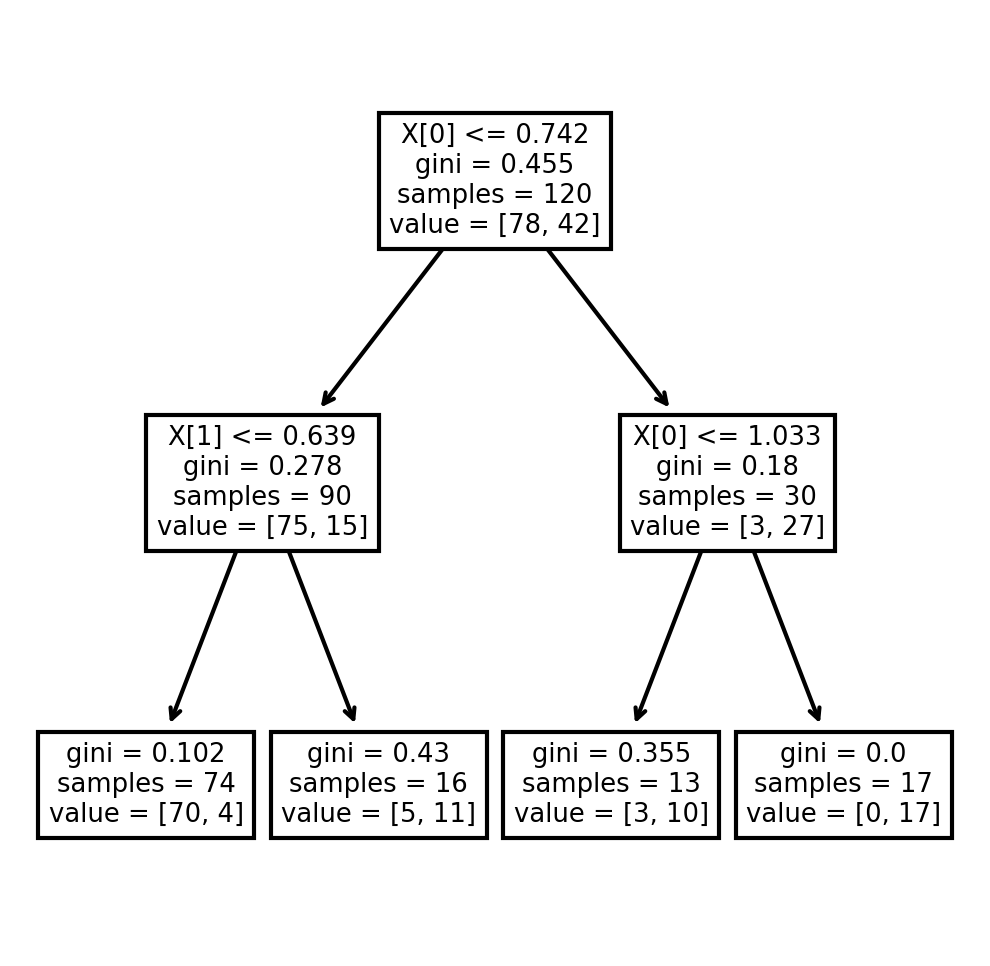

In [67]:
from sklearn import tree
fig, axes =plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dt.fit(x_test, y_test));
fig.savefig("imagename.png")